In [1]:
import os, sys, glob
import seaborn as sns
sys.path.insert(0, "../partitura")
sys.path.insert(0, "../")
import partitura as pt
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pandas as pd
import numpy.lib.recfunctions as rfn

SAMPLES_DIR = 'artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferFalse-ssfrac1-L12-C768-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4'
DEXTER_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter'
BM_SAMPLES_DIR = 'artifacts/samples/EVAL-basismixer'
SP_SAMPLES_DIR = 'artifacts/samples/EVAL-scoreperformer'
VN_SAMPLES_DIR = 'artifacts/samples/EVAL-virtuosonet'


In [2]:
dexter_eval_dir1 = glob.glob(f"{DEXTER_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
dexter_eval_dir2 = glob.glob(f"{DEXTER_SAMPLES_DIR}/**/*_distribution*.csv", recursive=True)
bm_eval_dir = glob.glob(f"{BM_SAMPLES_DIR}/**/*_distribution*.csv", recursive=True)
sp_eval_dir = glob.glob(f"{SP_SAMPLES_DIR}/**/*_distribution*.csv", recursive=True)
vn_eval_dir = glob.glob(f"{VN_SAMPLES_DIR}/**/*_distribution*.csv", recursive=True)


In [5]:
def replace_value(table):
    table = table.replace([np.inf, -np.inf], np.nan)
    table = table.replace(["--"], np.nan)
    for value in table.iloc[1]:
        if float(value) < 0:
            table.iloc[1] = table.iloc[1].replace(value, np.nan) # replace dummy value in KL divergence
    return table

def get_table_mean(eval_dir1, eval_dir2, N=10000, std=False):

    all_eval_table = [replace_value(pd.read_csv(eval_csv_path)) for eval_csv_path in eval_dir1][:N] # mean ignores nan but not ignores inf. So replace inf with nan
    print(f"number of available distribution in dir1: {len(all_eval_table)}")
    all_eval_table = pd.concat(all_eval_table)
    if std:
        eval_table_mean = all_eval_table.groupby(level=0).std()
    else:
        eval_table_mean = all_eval_table.groupby(level=0).mean()
    eval_table_mean = eval_table_mean.set_index(pd.Index(["Deviation", "KL Divergence", "Correlation"]))

    all_eval_table = [replace_value(pd.read_csv(eval_csv_path)) for eval_csv_path in eval_dir2][:N] # mean ignores nan but not ignores inf. So replace inf with nan
    print(f"number of available distribution in dir2: {len(all_eval_table)}")
    all_eval_table = pd.concat(all_eval_table)
    if std:
        eval_table_mean_ = all_eval_table.groupby(level=0).std()
    else:
        eval_table_mean_ = all_eval_table.groupby(level=0).mean()
    eval_table_mean_ = eval_table_mean_.set_index(pd.Index(["Deviation", "KL Divergence", "Correlation"]))

    eval_table_mean.iloc[2] = eval_table_mean_.iloc[2]
    return eval_table_mean


In [4]:
get_table_mean(dexter_eval_dir)


number of available distribution: 37


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.consistency_std,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.660129,-2.399200,3.859656,-0.546112,0.557045,-1.107030,2.510534,2.075044
KL Divergence,1.557642,0.180806,0.919236,0.142951,0.791907,0.966440,4.421604,1.590260
Correlation,0.134993,-0.125634,0.268429,0.969018,0.070875,0.048572,0.067376,0.322104


In [5]:
get_table_mean(dexter_eval_dir, std=True)

number of available distribution: 8382


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,4.004652,0.132287,1.558613,0.723016,1.692371,1.977422,2.131481,1.971711,1.118118,0.412877
KL Divergence,6.483199,0.113080,3.340667,0.041136,1.108198,4.261080,13.114779,2.752960,5.496181,4.202846
Correlation,0.174304,0.237571,0.202485,0.722494,0.119742,0.684820,0.384136,0.139878,0.180237,0.244240


In [6]:
get_table_mean(bm_eval_dir, std=True)


number of available distribution: 10000


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,1.965096,0.254893,2.356700,0.738007,1.319853,2.179999,2.246947,0.0,1.063065,0.329628
KL Divergence,0.919605,2.354351,5.491120,0.037714,0.225304,4.829283,15.321278,NaN,2.190020,1.845584
Correlation,0.163415,0.207079,0.194867,0.737748,0.201363,0.723730,0.407444,NaN,0.191499,0.324126


In [6]:
get_table_mean(sp_eval_dir)

number of available distribution: 6676


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,-0.843909,-0.004791,3.442750,-1.101479,0.768796,-0.873345,-0.870121,-1.0,2.448308,0.015879
KL Divergence,0.491224,0.030688,1.295293,0.047269,0.128060,0.916782,2.812033,NaN,2.210299,0.335220
Correlation,0.068064,0.707590,0.284455,-0.100541,0.929887,-0.046945,0.058768,NaN,-0.002968,0.025869


In [6]:
get_table_mean(sp_eval_dir, std=True)

number of available distribution: 6676


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,4.086535,0.061620,1.822478,0.829540,1.858058,1.905879,1.962625,0.0,1.997169,0.159572
KL Divergence,2.718309,0.060755,6.050637,0.079840,0.304252,4.137400,13.657943,NaN,11.839385,1.060070
Correlation,0.162258,0.236370,0.190515,0.828769,0.135080,0.834115,0.399143,NaN,0.131534,0.242742


In [5]:
get_table_mean(vn_eval_dir)

number of available distribution: 9838


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,-0.532162,-0.223108,4.184637,-0.894253,-0.042305,-0.744358,-0.922508,1.345763,0.415826,-0.045001
KL Divergence,0.299047,0.122416,4.430750,0.027781,0.115406,1.555685,2.554623,0.432748,0.700751,0.340631
Correlation,0.049198,0.515422,0.282629,0.106139,0.930927,0.081913,0.007568,-0.006976,-0.016285,0.017231


In [7]:
get_table_mean(vn_eval_dir, std=True)

number of available distribution: 9838


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,3.562685,0.262724,1.607957,0.787257,1.277191,1.943044,2.144552,1.547858,0.520485,0.176677
KL Divergence,3.226738,0.480102,14.003991,0.050379,0.830036,8.077380,9.817700,3.169061,3.721531,0.936164
Correlation,0.172811,0.261381,0.200622,0.786582,0.129492,0.804360,0.391785,0.124289,0.166411,0.231492


## Examples and plots for demonstration

In [3]:
piece_name = "batch=1/2_Beethoven_Piano_Sonatas_31-1"

SP = f"artifacts/samples/EVAL-scoreperformer/{piece_name}"
BM = f"artifacts/samples/EVAL-basismixer/{piece_name}"
VN = f"artifacts/samples/EVAL-virtuosonet/{piece_name}"
DX = f"artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferFalse-ssfrac1-L12-C768-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4/epoch=0/{piece_name}"
GT1 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_31-1_seg13/18_Beethoven_Piano_Sonatas_31-1"
GT2 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_31-1_seg13/19_Beethoven_Piano_Sonatas_31-1"
GT3 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_31-1_seg13/1270_Beethoven_Piano_Sonatas_31-1"
GT4 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_31-1_seg13/1271_Beethoven_Piano_Sonatas_31-1"

score = pt.load_score('../Datasets/asap-dataset-alignment/Beethoven/Piano_Sonatas/31-1/xml_score.musicxml')
snote_ids = np.load('/import/c4dm-datasets-ext/DiffPerformer/snote_ids/N=200/ASAP_Beethoven_Piano_Sonatas_31-1_seg13.npy')

/homes/hz009/Research/DExter/../partitura/partitura/directions.py:533: UserWarning: error parsing "Moderato cantabile molto espressivo" (UnexpectedCharacters)
  warnings.warn('error parsing "{}" ({})'.format(string, type(e).__name__))
/homes/hz009/Research/DExter/../partitura/partitura/directions.py:533: UserWarning: error parsing "(sanft)" (UnexpectedCharacters)
  warnings.warn('error parsing "{}" ({})'.format(string, type(e).__name__))
/homes/hz009/Research/DExter/../partitura/partitura/directions.py:533: UserWarning: error parsing "zurückhaltend
" (UnexpectedCharacters)
  warnings.warn('error parsing "{}" ({})'.format(string, type(e).__name__))


In [15]:
piece_name = "batch=1/14_Chopin_Etudes_op_10_8"

SP = f"artifacts/samples/EVAL-scoreperformer/{piece_name}"
BM = f"artifacts/samples/EVAL-basismixer/{piece_name}"
VN = f"artifacts/samples/EVAL-virtuosonet/{piece_name}"
DX = f"artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferFalse-ssfrac1-L12-C768-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4/epoch=0/{piece_name}"
GT1 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_8_seg1/30_Chopin_Etudes_op_10_8"
GT2 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_8_seg1/31_Chopin_Etudes_op_10_8"
GT3 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_8_seg1/322_Chopin_Etudes_op_10_8"
GT4 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_8_seg1/323_Chopin_Etudes_op_10_8"

score = pt.load_score('../Datasets/asap-dataset-alignment/Chopin/Etudes_op_10/8/xml_score.musicxml')
snote_ids = np.load('/import/c4dm-datasets-ext/DiffPerformer/snote_ids/N=200/ASAP_Chopin_Etudes_op_10_8_seg1.npy')

/homes/hz009/Research/DExter/../partitura/partitura/io/importmusicxml.py:946: UserWarning: ignoring direction type: metronome {'parentheses': 'yes', 'default-x': '-37.00', 'default-y': '40.00', 'relative-x': '30.00', 'relative-y': '44.00'}
  warnings.warn("ignoring direction type: {} {}".format(dt.tag, dt.attrib))
/homes/hz009/Research/DExter/../partitura/partitura/io/importmusicxml.py:936: UserWarning: Did not find a pedal start element for pedal stop!
  warnings.warn("Did not find a pedal start element for pedal stop!")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


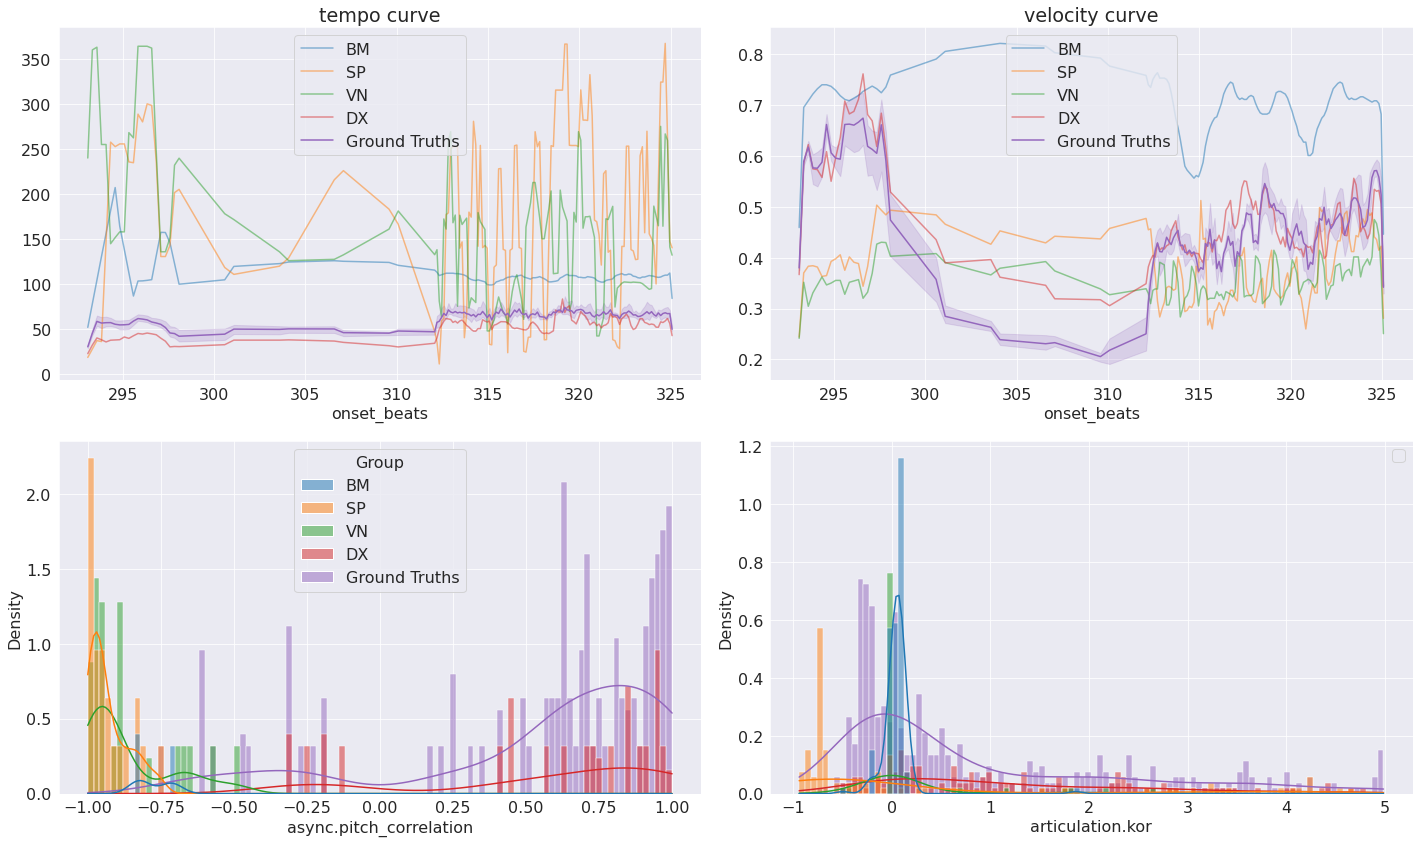

In [14]:
from scipy.interpolate import UnivariateSpline

plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
# unfold the score if necessary (mostly for ASAP)
if ("-" in snote_ids[0] and 
    "-" not in score.note_array()['id'][0]):
    score = pt.score.unfold_part_maximal(pt.score.merge_parts(score.parts)) 
na = score.note_array()
na = na[np.in1d(na['id'], snote_ids)]
onset_beats = np.unique(na['onset_beat'])

fig, ax = plt.subplots(2, 2, figsize=(20, 12))

pcodecs = []

GT_tempos, GT_vels = [], []
PSET_PC, PSET_KOR, PC, KOR = [], [], [], []
labels = ["BM", "SP", "VN", "DX"]
for idx, name in enumerate([BM, SP, VN, DX, 
                            GT1, GT2, GT3, GT4]):

    tv_curves = pd.read_csv(f"{name}_tv_feats.csv")
    onset_beats, tempo_curve, velocity_curve = tv_curves['onset_beats'], tv_curves['performed_tempo'], tv_curves['performed_vel']
    feats = pd.read_csv(f"{name}_feats_pred.csv")

    tempo_curve = np.clip(tempo_curve, 0, 480)

    # smooth the tempo_curve and velocity curve for better plotting
    tempo_curve_smooth_ = UnivariateSpline(onset_beats[tempo_curve <= 480], tempo_curve[tempo_curve <= 480])
    tempo_curve_smooth_.set_smoothing_factor(10)
    tempo_curve_smooth = tempo_curve_smooth_(onset_beats)
    velocity_curve_smooth_ = UnivariateSpline(onset_beats[~np.isnan(velocity_curve)], velocity_curve[~np.isnan(velocity_curve)])
    velocity_curve_smooth_.set_smoothing_factor(0.1)
    velocity_curve_smooth = velocity_curve_smooth_(onset_beats)

    tempo_curve_smooth = np.convolve(tempo_curve, np.ones(4)/4, mode='same')
    velocity_curve_smooth = np.convolve(velocity_curve, np.ones(3)/3, mode='same')

    if np.isinf(tempo_curve).any():
        raise RuntimeError("inf in tempo")
    
    pc = feats['asynchrony_feature.pitch_cor']
    kor = feats['articulation_feature.kor']
    PC.extend(pc[pc != 0])
    KOR.extend(kor[(kor != -1) & (kor != 5)])

    if idx < 4:
        sns.lineplot(x=onset_beats, y=tempo_curve_smooth, ax=ax[0][0], label=labels[idx], alpha=0.5)
        sns.lineplot(x=onset_beats, y=velocity_curve_smooth, ax=ax[0][1], label=labels[idx], alpha=0.5)
        PSET_PC.extend([labels[idx]] * len(pc[pc != 0]))
        PSET_KOR.extend([labels[idx]] * len(kor[(kor != -1) & (kor != 5)]))
    else:
        GT_tempos.extend(tempo_curve_smooth)
        GT_vels.extend(velocity_curve_smooth)
        PSET_PC.extend(["Ground Truths"] * len(pc[pc != 0]))
        PSET_KOR.extend(["Ground Truths"] * len(kor[(kor != -1) & (kor != 5)]))
    # ax[0].plot(onset_beats, tempo_curve)
    # ax[1].plot(onset_beats, velocity_curve)

data_pc = pd.DataFrame({"Group": PSET_PC, "async.pitch_correlation": PC,})
data_kor = pd.DataFrame({"Group": PSET_KOR, "articulation.kor": KOR,})

sns.lineplot(x=np.tile(onset_beats, 4), y=GT_tempos, ax=ax[0][0], label='Ground Truths')
sns.lineplot(x=np.tile(onset_beats, 4), y=GT_vels, ax=ax[0][1], label='Ground Truths')
# ax[0][0].set_ylim(-80, 500)
ax[0][0].set_title("tempo curve")
ax[0][1].set_title("velocity curve")
sns.histplot(data=data_pc, x="async.pitch_correlation", hue='Group', ax=ax[1][0], bins=100, stat='density', kde=True)
sns.histplot(data=data_kor, x="articulation.kor", hue='Group', ax=ax[1][1], bins=100, stat='density', kde=True)

plt.tight_layout()
plt.legend()



## Transfer

In [7]:
T_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac1-L12-C768-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4"
T34_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.75-L12-C768-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4"
T12_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.5-L12-C768-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4"
T14_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.25-L12-C768-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4"

piece_name = "batch=1/2_Beethoven_Piano_Sonatas_31-1"

DX = f"{T_PATH}/epoch=0/{piece_name}"
DX34 = f"{T34_PATH}/epoch=0/{piece_name}"
DX12 = f"{T12_PATH}/epoch=0/{piece_name}"
DX14 = f"{T14_PATH}/epoch=0/{piece_name}"

SOURCE = f"{T34_PATH}/epoch=0/{piece_name}_source"
LABEL = f"{T34_PATH}/epoch=0/{piece_name}_label"


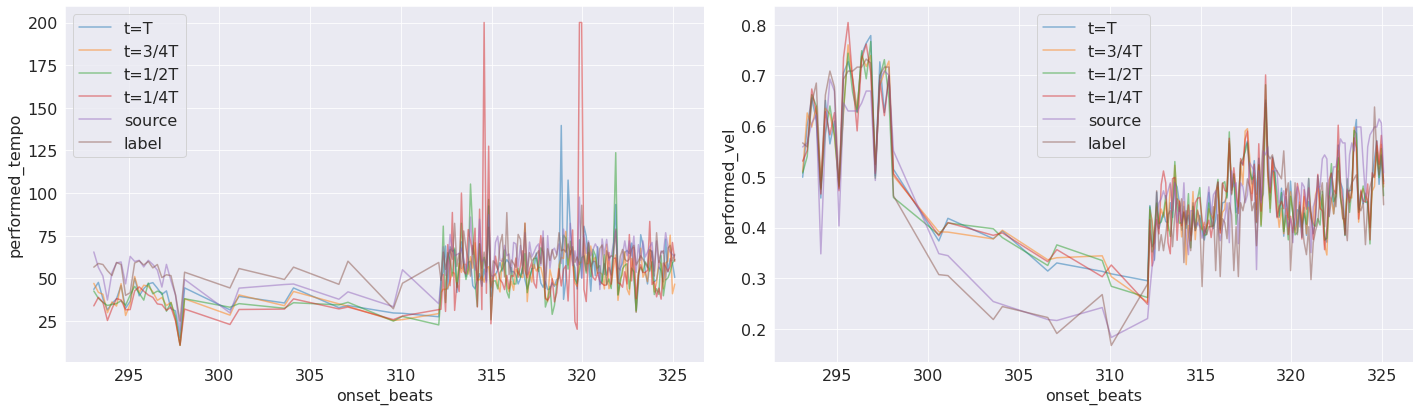

In [10]:
from scipy.interpolate import UnivariateSpline

plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

GT_tempos, GT_vels = [], []
labels = [
    "t=T", 
    "t=3/4T", "t=1/2T", "t=1/4T", "source", "label"]
for idx, name in enumerate([
                        DX, 
                        DX34, DX12, DX14, SOURCE, LABEL]):
    # N = min(len(na), len(pcodec))
    # joint_pcodec = rfn.merge_arrays([na[:N], pcodec[:N]], flatten = True, usemask = False)
    # bp = [joint_pcodec[joint_pcodec['onset_beat'] == ob]['beat_period'].mean() for ob in onset_beats]
    # vel = [joint_pcodec[joint_pcodec['onset_beat'] == ob]['velocity'].mean() for ob in onset_beats]
    # tempo_curve, velocity_curve = 60 / np.array(bp), np.array(vel)
    tv_curves = pd.read_csv(f"{name}_tv_feats.csv")
    onset_beats, tempo_curve, velocity_curve = tv_curves['onset_beats'], tv_curves['performed_tempo'], tv_curves['performed_vel']
    tempo_curve = np.clip(tempo_curve, 0, 200)

    # smooth the tempo_curve and velocity curve for better plotting
    tempo_curve_smooth_ = UnivariateSpline(onset_beats[tempo_curve <= 480], tempo_curve[tempo_curve <= 480])
    tempo_curve_smooth_.set_smoothing_factor(10)
    tempo_curve_smooth = tempo_curve_smooth_(onset_beats)
    velocity_curve_smooth_ = UnivariateSpline(onset_beats[~np.isnan(velocity_curve)], velocity_curve[~np.isnan(velocity_curve)])
    velocity_curve_smooth_.set_smoothing_factor(0.1)
    velocity_curve_smooth = velocity_curve_smooth_(onset_beats)

    tempo_curve_smooth = np.convolve(tempo_curve, np.ones(4)/4, mode='same')
    velocity_curve_smooth = np.convolve(velocity_curve, np.ones(3)/3, mode='same')

    if np.isinf(tempo_curve).any():
        raise RuntimeError("inf in tempo")

    sns.lineplot(x=onset_beats, y=tempo_curve, ax=ax[0], label=labels[idx], alpha=0.5)
    sns.lineplot(x=onset_beats, y=velocity_curve, ax=ax[1], label=labels[idx], alpha=0.5)

ax[0].set_title('tempo curve')
ax[1].set_title('velocity curve')

plt.tight_layout()
plt.legend()



In [2]:
T_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter1'
T34_SAMPLES_DIR = 'artifacts/samples/EVAL-ta-dexter34'
T12_SAMPLES_DIR = 'artifacts/samples/EVAL-t-dexter12'
T14_SAMPLES_DIR = 'artifacts/samples/EVAL-ta-dexter14'

t_tv_dir = glob.glob(f"{T_SAMPLES_DIR}/**/*_tv_feats.csv", recursive=True)
t34_tv_dir = glob.glob(f"{T34_SAMPLES_DIR}/**/*_tv_feats.csv", recursive=True)
t12_tv_dir = glob.glob(f"{T12_SAMPLES_DIR}/**/*_tv_feats.csv", recursive=True)
t14_tv_dir = glob.glob(f"{T14_SAMPLES_DIR}/**/*_tv_feats.csv", recursive=True)

In [5]:
# get_table_mean(t_tv_dir)

all_eval_table = [replace_value(pd.read_csv(eval_csv_path)) for eval_csv_path in t_tv_dir][:10] # mean ignores nan but not ignores inf. So replace inf with nan
all_eval_table = pd.concat(all_eval_table)

eval_table_mean = all_eval_table.groupby(level=0).mean()
eval_table_mean
# eval_table_mean = eval_table_mean.set_index(pd.Index(["Deviation", "KL Divergence", "Correlation"]))


In [ ]:
get_table_mean(t34_tv_dir)

In [ ]:
get_table_mean(t12_tv_dir)

In [ ]:
get_table_mean(t14_tv_dir)